# 1. Análisis Exploratorio de datos

In [30]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Como la predicción a realizar es una regresión (valor numerico continuo) y no clasificación, se importan modelos de regresión.
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import StandardScaler        # Para que la magnitud de las distintas variables estén en la misma escala.
from sklearn.model_selection import train_test_split    # El dataset ya viene dividido... se volverá a dividir? ----> A simple vista no debiese usarse
from sklearn.preprocessing import LabelEncoder          # Para codificar las variables categóricas en numéricas ----> Si existen tipo Object: 	f_61	f_121	f_215	f_237
from sklearn.metrics import mean_squared_error          # Métrica requerida en el enunciado del problema (error cuadrático medio)


# Configurando una seed para reproducibilidad
random.seed(42)

## Recordar del enunciado del problema
**Descripción de datos**

Se proporcionan dos archivos delimitados por tabulaciones junto con estas instrucciones:

* **codetest_train.txt**: 5000 registros x 254 features + 1 target (~7,8 MB)
* **codetest_test.txt**: 1000 registros x 254 features (~1,5 MB)


In [31]:
# Carga de datos
train_data = pd.read_csv("datasets\codetest_train.txt", delimiter="\t")
test_data = pd.read_csv("datasets\codetest_test.txt", delimiter="\t")

train_data.head()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
0,3.066056,-0.653,0.255,-0.615,-1.833,-0.736,NaN,1.115,-0.171,-0.351,...,-1.607,-1.400,-0.920,-0.198,-0.945,-0.573,0.170,-0.418,-1.244,-0.503
1,-1.910473,1.179,-0.093,-0.556,0.811,-0.468,-0.005,-0.116,-1.243,1.985,...,1.282,0.032,-0.061,NaN,-0.061,-0.302,1.281,-0.850,0.821,-0.260
2,7.830711,0.181,-0.778,-0.919,0.113,0.887,-0.762,1.872,-1.709,0.135,...,-0.237,-0.660,1.073,-0.193,0.570,-0.267,1.435,1.332,-1.147,2.580
3,-2.180862,0.745,-0.245,-1.343,1.163,-0.169,-0.151,-1.100,0.225,1.223,...,0.709,-0.203,-0.136,-0.571,1.682,0.243,-0.381,0.613,1.033,0.400
4,5.462784,1.217,-1.324,-0.958,0.448,-2.873,-0.856,0.603,0.763,0.020,...,0.892,-0.433,-0.877,0.289,0.654,1.230,0.457,-0.754,-0.025,-0.931


## Resumen global de los datos

In [32]:
# Cálculo de estadísticas básicas del dataset
# Son tantas variables que se hace imposible revisar todas.
train_data.describe()

,target,f_0,f_1,f_2,f_3,f_4,f_5,f_6,f_7,f_8,...,f_244,f_245,f_246,f_247,f_248,f_249,f_250,f_251,f_252,f_253
count,5000.000000,4903.000000,4928.000000,4908.000000,4910.000000,4907.000000,4912.000000,4897.000000,4904.000000,4893.000000,...,4910.000000,4883.000000,4914.000000,4894.000000,4902.000000,4886.000000,4900.000000,4921.000000,4904.000000,4904.000000
mean,1.143878,-0.000433,0.002564,0.028877,-0.005437,-0.006759,0.005569,0.001536,-0.001019,0.009744,...,0.013529,0.004941,0.023261,-0.018447,-0.009842,0.016958,-0.004947,0.016868,-0.001351,0.010334
std,5.259896,0.999739,0.997930,1.019337,0.990351,1.006293,0.995799,1.004624,0.997356,0.988310,...,1.001453,0.997330,0.996458,1.005000,0.989228,1.011331,0.991577,1.001358,1.003411,1.006896
min,-26.705570,-3.941000,-3.847000,-3.818000,-3.434000,-3.400000,-4.051000,-3.179000,-3.890000,-3.857000,...,-3.585000,-3.494000,-3.485000,-4.012000,-3.252000,-3.821000,-3.376000,-3.373000,-3.950000,-3.728000
25%,-2.034383,-0.673000,-0.685000,-0.651000,-0.655000,-0.685500,-0.660000,-0.672000,-0.679000,-0.662000,...,-0.665750,-0.676000,-0.661750,-0.692000,-0.663000,-0.647750,-0.679500,-0.647000,-0.695000,-0.677000
50%,1.166835,-0.011000,-0.003000,0.047500,0.003500,-0.007000,-0.008000,-0.003000,-0.021500,0.017000,...,0.026000,-0.028000,0.027000,-0.035000,-0.010500,0.002500,0.010000,0.020000,0.002500,0.015000
75%,4.439549,0.677000,0.674500,0.719000,0.668000,0.654000,0.649000,0.679000,0.670250,0.698000,...,0.671750,0.670000,0.702500,0.655000,0.651000,0.709750,0.660250,0.692000,0.672250,0.705250
max,26.347818,3.831000,3.996000,3.199000,4.962000,3.106000,4.296000,4.166000,3.798000,4.195000,...,3.365000,3.456000,3.881000,3.690000,3.629000,4.144000,3.873000,3.187000,3.724000,3.956000


* Se observa que la variable Target presenta un rango de valores mayor que el resto de variables *(-26.7 a 26.4)*, por lo cual es buena idea escalar los datos.

Text(0.5, 1.0, 'Distribución de la variable target')

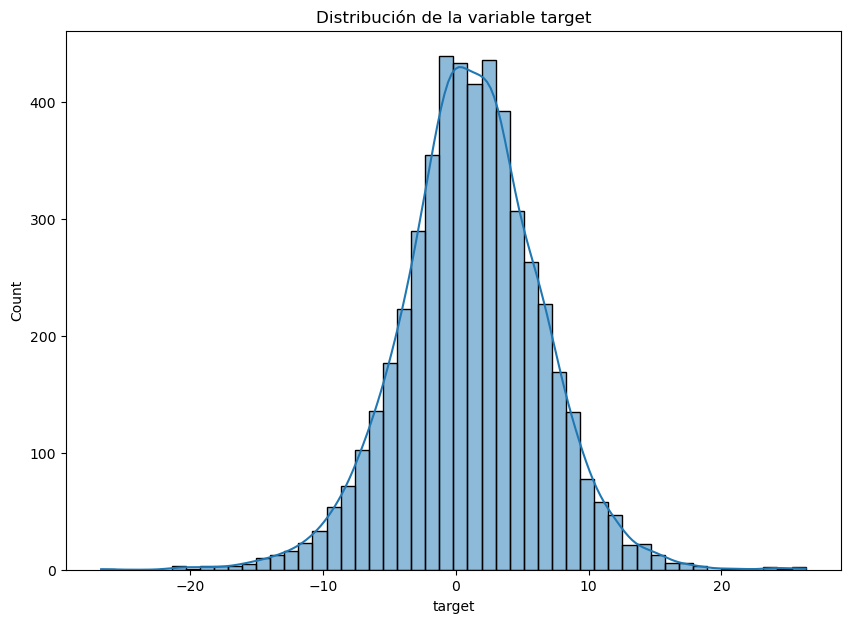

In [33]:
# Visualización de la distribución de variable "target"
plt.figure(figsize=(10,7))
sns.histplot(train_data["target"], kde=True, bins=50)
plt.title("Distribución de la variable target")

**Observaciones:**
* La variable cuenta con una distribución normal.
* No se observan valores atípicos.

# 2. Preparación de datos

### Revisión del tipo de datos (Int, Float o Object)

---

In [34]:
# Revisamos el tipo de datos que almacenan las features
# Notamos que existen 4 features de tipo object
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 255 entries, target to f_253
dtypes: float64(251), object(4)
memory usage: 9.7+ MB


**Observaciones:**
1. Ambos dataset presentan columnas categóricas, las cuales son: **'f_61', 'f_121', 'f_215', 'f_237'** que representan letras, colores y países.
2. Para trabajar con modelos de ML, es necesario codificarlas/transformarlas a valores numéricos. *(LabelEncoder o OneHotEncoding)*
3. Antes de realizar alguna transformación, realizaré la revisión de valores faltantes y su imputación en caso que existan.

### 2.1 Encoding (categóricas a numéricas)
---
Esta etapa se realiza primero que la imputación de Datos faltantes (2.2) ya que de lo contrario al intentar realizar una imputación sobre columnas categóricas (con letras) generará error.

La otra opción, si no se quiere hacer primero el encoding (que no tiene ninguna falla o error hacerlo primero) sería limitar el ciclo FOR y excluir las variables categóricas, pero sería complicar el flujo.

In [35]:
# Identificamos las features de tipo object
train_data.select_dtypes(include="object"), test_data.select_dtypes(include="object")

(     f_61 f_121   f_215   f_237
 0       b     D     red  Canada
 1       a     A    blue  Canada
 2       b     B  orange  Canada
 3       a     C    blue     USA
 4       b     E  orange  Canada
 ...   ...   ...     ...     ...
 4995    e     B    blue  Canada
 4996    c     F     red  Canada
 4997    d     F  yellow  Mexico
 4998    d     C    blue     USA
 4999    a     B     red  Mexico
 
 [5000 rows x 4 columns],
     f_61 f_121   f_215   f_237
 0      e     A  yellow  Mexico
 1      d     B     red  Canada
 2      d     C     NaN  Mexico
 3      e     E    blue     USA
 4      b     C     NaN  Mexico
 ..   ...   ...     ...     ...
 995    b     B  yellow     USA
 996    b     B  yellow  Mexico
 997    e     D     red  Canada
 998    c     B     red  Mexico
 999    d     F     red  Canada
 
 [1000 rows x 4 columns])

In [36]:
cols_categoricas = list(train_data.select_dtypes(include="object").columns)

print("Las siguientes son las columnas categóricas (train y test):\n " + str(cols_categoricas))

Las siguientes son las columnas categóricas (train y test):
 ['f_61', 'f_121', 'f_215', 'f_237']


**Observaciones:**
* Se detectaron las variables categóricas: **f_61, f_121, f_215 y f_237**
* Debo aplicar un "encoder" para transformarlas a variables numéricas.
    * Esto provocará que aumente el numero de características de ***train_data (255)*** y ***test_data (254)***. 
        * **Corrección**: Este encoder (LabelEncoder) no genera nuevas características, en su lugar mantiene la misma columna pero reemplaza cada categoría por un numero entero (1, 2, 3, 4... etc)
        * El potencial problema de este encoder es que el modelo de ML puede interpretar que a mayor numero, mayor importancia, lo cual no necesariamente es cierto. 

In [37]:
# Instanciando el encoder
encoder = LabelEncoder()

# For que recorre las categorías no numéricas de train_data
for col in cols_categoricas:
    train_data[col] = encoder.fit_transform(train_data[col].astype(str))

# For que recorre las categorías no numéricas de test_data
for col in cols_categoricas:
    test_data[col] = encoder.fit_transform(test_data[col].astype(str))
    
# Confirmando que el dataframe ahora tiene solo características numéricas
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Columns: 255 entries, target to f_253
dtypes: float64(251), int32(4)
memory usage: 9.7 MB


In [38]:
print("Las antiguas variables categoricas ahora son numericas y tienen la siguiente cantidad de numeros unicos:")
print(train_data[['f_61', 'f_121', 'f_215', 'f_237']].nunique())

Las antiguas variables categoricas ahora son numericas y tienen la siguiente cantidad de numeros unicos:
f_61     6
f_121    7
f_215    5
f_237    4
dtype: int64


### 2.2 Datos faltantes
---

In [39]:
# Chequeo si existen datos faltantes o nulos
# Ambos dataset presentan datos faltantes.
# Proceder: ¿Eliminar o Imputar?
print("Porcentaje de datos NaN en train_data:\n", train_data.isna().sum()/len(train_data)*100)
print("\n=============================\n")
print("Porcentaje de datos NaN en test_data:\n", test_data.isna().sum()/len(test_data)*100)

Porcentaje de datos NaN en train_data:
 target    0.00
f_0       1.94
f_1       1.44
f_2       1.84
f_3       1.80
          ... 
f_249     2.28
f_250     2.00
f_251     1.58
f_252     1.92
f_253     1.92
Length: 255, dtype: float64


Porcentaje de datos NaN en test_data:
 f_0      2.8
f_1      1.7
f_2      1.7
f_3      1.8
f_4      2.2
        ... 
f_249    2.0
f_250    1.9
f_251    2.2
f_252    2.1
f_253    1.5
Length: 254, dtype: float64


**Observaciones:**
* En algunas columnas faltan hasta el 2% de los datos.
* La forma de proceder en este caso en particular será realizar la imputación por la **mediana**
    * Motivo: La mediana es una medida central de los datos y que **no se ve mayormente afectada por los datos atípicos** (outliers).

Imputación de NaN
Se utilizará la Mediana para el reemplazo de valores faltantes.
Existen varias formas de realizar el reemplazo en cada columna:
1. Forma 1: Crear un FOR que recorra la lista de columnas identificadas con valores faltantes y aplicar el reemplazo en ellas.
2. Forma 2: Aplicar la función fillna() a todo el dataset. La función solo reemplazará los valores en las columnas que detecte que tienen NaN.
    * No se puede utilizar este método ya que train_data.fillna(train_data.median(), inplace=True) dará error, debido a que reconoce a las columnas categóricas como NaN y no puede reemplazar letras por su media (se podría solucionar usando su moda, que si existe para variables categóricas, pero no lo usaré en este caso.)

In [40]:
# Imputacion de NaN por la mediana
# Forma 1: Aplicar fillna() a todas las columnas del train_data. Para esto se debe aplicar un FOR que ponga cada una de las columnas dentro del fillna(train_data[col].median())

# Imputando la mediana en train_data
for col in train_data.columns:
    train_data[col] = train_data[col].fillna(train_data[col].median())
    
# Imputando la mediana para test_data
for col in test_data.columns:
    test_data[col] = test_data[col].fillna(test_data[col].median())

In [53]:
missing_train = train_data.isnull().sum()
print("Cantidad de datos NaN en train_data:\n" , missing_train[missing_train > 0])

missing_test = test_data.isnull().sum()
print("\nCantidad de datos NaN en test_data:\n", missing_test[missing_test > 0])

Cantidad de datos NaN en train_data:
 Series([], dtype: int64)

Cantidad de datos NaN en test_data:
 Series([], dtype: int64)


**Observaciones:**
* Se han reemplazado las variables categóricas por numéricas en ambos datasets.
* Se han imputado valores NaN por la mediana de sus variables, en ambos datasets.

# 3. Modelado

# 4. Conclusiones